# Problema 1

Help on function legend in module matplotlib.pyplot:

legend(*args, **kwargs) -> 'Legend'
    Place a legend on the Axes.

    Call signatures::

        legend()
        legend(handles, labels)
        legend(handles=handles)
        legend(labels)

    The call signatures correspond to the following different ways to use
    this method:

    **1. Automatic detection of elements to be shown in the legend**

    The elements to be added to the legend are automatically determined,
    when you do not pass in any extra arguments.

    In this case, the labels are taken from the artist. You can specify
    them either at artist creation or by calling the
    :meth:`~.Artist.set_label` method on the artist::

        ax.plot([1, 2, 3], label='Inline label')
        ax.legend()

    or::

        line, = ax.plot([1, 2, 3])
        line.set_label('Label via method')
        ax.legend()

    .. note::
        Specific artists can be excluded from the automatic legend element
        selectio

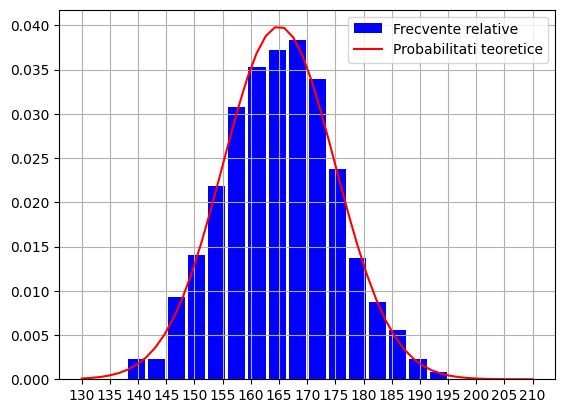

Valodare medie: 164.89
Deviatia standard: 9.89
Proportia de valori in intervualul [160,170]: 0.37
Valoare medie teoretica: 165.00
Deviatia medie teoretica: 10.00
Proportia de valori in intervalul [160,170] teoretica: 0.39


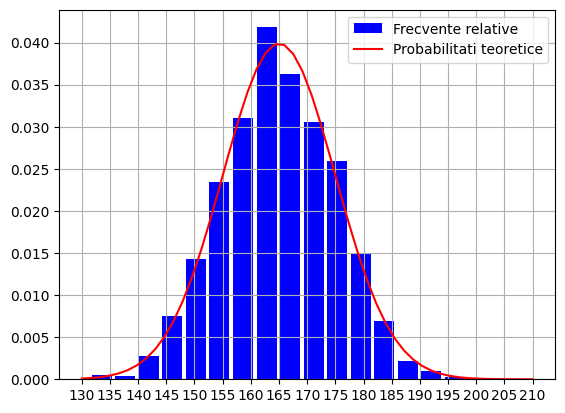

Valodare medie: 165.05
Deviatia standard: 9.97
Proportia de valori in intervualul [160,170]: 0.38
Valoare medie teoretica: 165.00
Deviatia medie teoretica: 10.00
Proportia de valori in intervalul [160,170] teoretica: 0.38


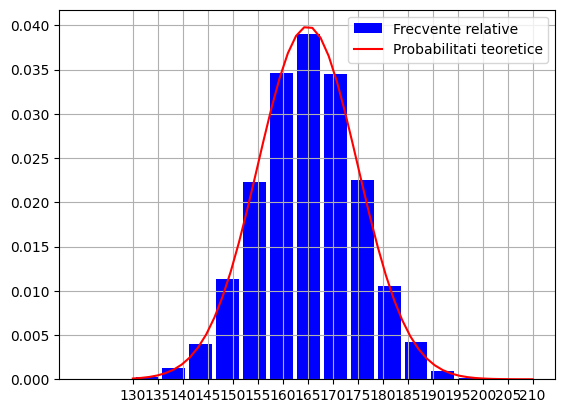

In [15]:
from random import uniform

from  numpy import linspace,mean as mn,std
from scipy.stats import norm
from matplotlib import pyplot as plt
N = [1000,2000,5000]
mean = 165
standard_deviation = 10
help(plt.legend)
bars = 16
interval = [i for i in range(130,211,5)]

for n in N:
    heights = norm.rvs(loc=mean, scale=standard_deviation, size=n)

    points = linspace(interval[0],interval[-1])

    valoarea_medie = mn(heights)
    deviatia_standard = std(heights)
    proportie = sum(1 for h in heights if 160 <= h <= 170) / n

    print(f"Valodare medie: {valoarea_medie:.2f}")
    print(f"Deviatia standard: {deviatia_standard:.2f}")
    print(f"Proportia de valori in intervualul [160,170]: {proportie:.2f}")

    print(f"Valoare medie teoretica: {norm.mean(loc=mean, scale=standard_deviation):.2f}")
    print(f"Deviatia medie teoretica: {norm.std(loc=mean,scale=standard_deviation):.2f}")
    print(f"Proportia de valori in intervalul [160,170] teoretica: {norm.cdf(170,loc=mean,scale=deviatia_standard)
                                                                    -norm.cdf(160,loc=mean,scale=deviatia_standard):.2f}")

    plt.hist(heights, bins=bars, density=True, label="Frecvente relative", rwidth=0.85, color='blue')
    plt.plot(points, [norm.pdf(i,loc=mean, scale=standard_deviation) for i in points], label="Probabilitati teoretice", color='red')

    plt.xticks(interval)
    plt.grid()
    plt.legend()
    plt.show()


In [22]:
import scipy
from numpy import multiply

help(multiply)

Help on ufunc in module numpy:

multiply = <ufunc 'multiply'>
    multiply(x1, x2, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature])

    Multiply arguments element-wise.

    Parameters
    ----------
    x1, x2 : array_like
        Input arrays to be multiplied.
        If ``x1.shape != x2.shape``, they must be broadcastable to a common
        shape (which becomes the shape of the output).
    out : ndarray, None, or tuple of ndarray and None, optional
        A location into which the result is stored. If provided, it must have
        a shape that the inputs broadcast to. If not provided or None,
        a freshly-allocated array is returned. A tuple (possible only as a
        keyword argument) must have length equal to the number of outputs.
    where : array_like, optional
        This condition is broadcast over the input. At locations where the
        condition is True, the `out` array will be set to the ufunc result.
        El

# Problema 2

In [28]:
import numpy
from scipy.stats import expon,uniform

p1 = 0.4
p2 = 0.6

#t1
alpha = 1/5
t1_medie = expon.mean(loc=0,scale=1/alpha)
t1_std = expon.var(loc=0,scale=1/alpha)

#t2
a = 4
b = 6
t2_medie = uniform.mean(loc=4,scale=(b-a))
t2_std = uniform.var(loc=4,scale=(b-a))

valoare_medie_printare = p1*t1_medie + p2*t2_medie
deviatia_standard_printare = numpy.sqrt(p1 * t1_std + p2 * t2_std)

print(f"Valoare medie printare: {valoare_medie_printare:.2f}")
print(f"Deviatia standard printare: {deviatia_standard_printare:.2f}")

n = 10000
timpi = []

for _ in range(n):
    if numpy.random.random() < p1:
        t = expon.rvs(loc=0,scale=1/alpha)
    else:
        t = uniform.rvs(loc=4,scale=(b-a))
    timpi.append(t)

timpi = mn(numpy.array(timpi) < 5)

prob_teoretica = p1*expon.cdf(5,loc=0,scale=1/alpha) + p2*uniform.cdf(5,loc=4,scale=(b-a))

print(f"Probabilitate estimata: {timpi:.6f}")
print(f"Probabilitatea teoretica ca timpul de printare sa fie < 5: {prob_teoretica:.6f}")

Valoare medie printare: 5.00
Deviatia standard printare: 3.19
Probabilitate estimata: 0.546800
Probabilitatea teoretica ca timpul de printare sa fie < 5: 0.552848


# Problema 3

In [40]:
b = 3
a = -1
n = 10000

integrala_estimata = (b-a)*mn([numpy.exp(-i*i) for i in uniform.rvs(loc = a, scale = (b-a),size=n)])
integrala_teoretic = scipy.integrate.quad(lambda x : numpy.exp(-x*x),a,b)[0]
print(f"Valoarea teoretica a integralei: {integrala_teoretic:.6f}")
print(f"Valoarea estimata a integralei: {integrala_estimata:.6f}")

Valoarea teoretica a integralei: 1.633031
Valoarea estimata a integralei: 1.630709
